# Prepare Data

In [540]:
!wget 'https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW02/hr-employee-attrition-with-null.csv' 

--2022-02-09 09:47:36--  https://raw.githubusercontent.com/ekapolc/pattern_2022/main/HW/HW02/hr-employee-attrition-with-null.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259872 (254K) [text/plain]
Saving to: ‘hr-employee-attrition-with-null.csv.6’

hr-employee-attriti 100%[===================>] 253.78K  --.-KB/s    in 0.004s  

2022-02-09 09:47:36 (63.0 MB/s) - ‘hr-employee-attrition-with-null.csv.6’ saved [259872/259872]



In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [542]:
all = pd.read_csv('hr-employee-attrition-with-null.csv')

In [543]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1470 non-null   int64  
 1   Age                       1176 non-null   float64
 2   Attrition                 1470 non-null   object 
 3   BusinessTravel            1176 non-null   object 
 4   DailyRate                 1176 non-null   float64
 5   Department                1176 non-null   object 
 6   DistanceFromHome          1176 non-null   float64
 7   Education                 1176 non-null   float64
 8   EducationField            1176 non-null   object 
 9   EmployeeCount             1176 non-null   float64
 10  EmployeeNumber            1176 non-null   float64
 11  EnvironmentSatisfaction   1176 non-null   float64
 12  Gender                    1176 non-null   object 
 13  HourlyRate                1176 non-null   float64
 14  JobInvol

In [544]:
all.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,1.0,2.0,Female,94.0,3.0,2.0,NaN,4.0,Single,NaN,19479.0,8.0,Y,Yes,11.0,NaN,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,2.0,3.0,Male,61.0,2.0,2.0,Research Scientist,2.0,Married,NaN,24907.0,1.0,Y,NaN,23.0,NaN,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,4.0,NaN,Male,92.0,2.0,1.0,Laboratory Technician,3.0,Single,NaN,2396.0,6.0,Y,Yes,15.0,3.0,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,NaN,Female,56.0,3.0,1.0,Research Scientist,3.0,NaN,2909.0,23159.0,1.0,Y,Yes,11.0,3.0,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,1.0,Male,40.0,NaN,1.0,NaN,2.0,NaN,3468.0,16632.0,NaN,Y,No,NaN,3.0,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [545]:
cat_cols = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "Over18", "OverTime"]
all.loc[all["Attrition"] == "No", "Attrition"] = 0.0
all.loc[all["Attrition"] == "Yes", "Attrition"] = 1.0
for col in cat_cols:
    all[col] = pd.Categorical(all[col]).codes

In [546]:
all = all.drop(columns = ["EmployeeNumber", "Unnamed: 0"])

In [547]:
from sklearn.model_selection import train_test_split

In [548]:
y = all.pop('Attrition')
X = all

train_set,test_set,train_res,test_res = train_test_split(X,y,stratify=y,test_size=0.10, random_state=27 )

# Histogram discretization

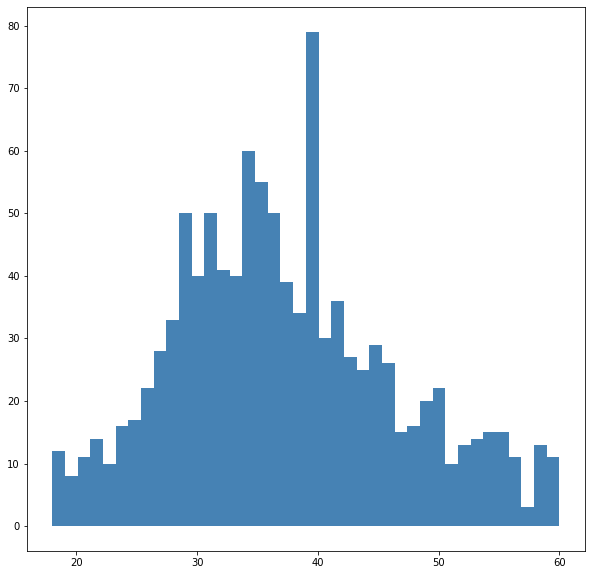

In [549]:
col = "Age"
# remove NaN values
train_col_no_nan = train_set[~np.isnan(train_set[col])][col]
# bin the data into 40 equally spaced bins
# hist is the count for each bin
# bin_edge is the edge values of the bins
hist, bin_edge = np.histogram(train_col_no_nan, 40)
# plot the histogram
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
plt.show()

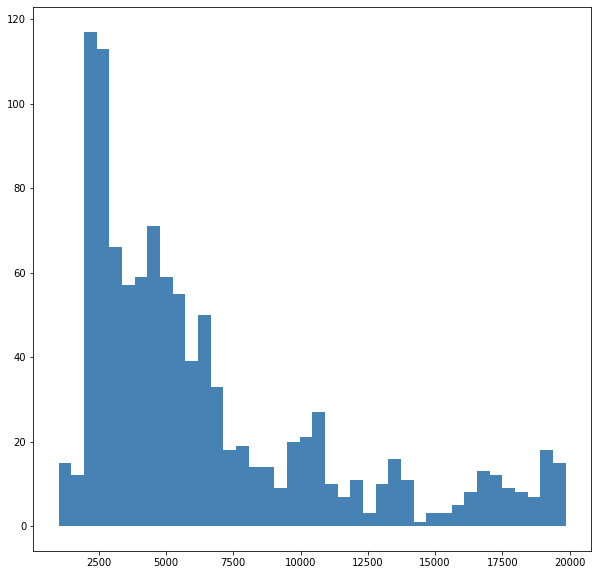

In [550]:
col = "MonthlyIncome"
# remove NaN values
train_col_no_nan = train_set[~np.isnan(train_set[col])][col]
# bin the data into 40 equally spaced bins
# hist is the count for each bin
# bin_edge is the edge values of the bins
hist, bin_edge = np.histogram(train_col_no_nan, 40)
# plot the histogram
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
plt.show()

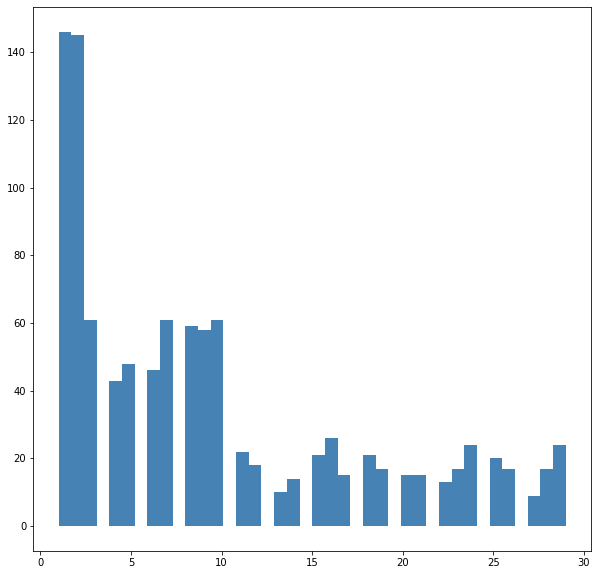

In [551]:
col = "DistanceFromHome"
# remove NaN values
train_col_no_nan = train_set[~np.isnan(train_set[col])][col]
# bin the data into 40 equally spaced bins
# hist is the count for each bin
# bin_edge is the edge values of the bins
hist, bin_edge = np.histogram(train_col_no_nan, 40)
# plot the histogram
plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
plt.show()


## **T4.** Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

Age: 0 bin <br/>
MonthlyIncome: 0 bin <br/>
DistanceFromHome: 11 bins <br/>
I think this is good discretization because the data is could spread on all bins on Age and MonthlyIncome. <br/>
And although DistanceFromHome got many zero count bin but the zero count bin gap between each is balance so I think it still a good discretization


## **T5.** Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

Yes, because of Central limit theorem said that<br/>
 "when independent random variables are added, their sum tends toward a normal distribution even if original variables themselves are **not** normally distributed For 30 sizes or more datas" <br/>
 so this way we could said that all histogram could estimate by Gaussian and also GMM could estimate our estimate this histogram.

In [552]:
def bin_and_count(data, scol, no_bin=10, train_set=train_set):
  train_col_no_nan = train_set[~np.isnan(train_set[scol])][scol]
  hist, bin_edge = np.histogram(train_col_no_nan, no_bin)
  bin_edge[0] = -np.inf
  bin_edge[bin_edge.shape[0] - 1] = np.inf

  data_col_no_nan = data[~np.isnan(data[scol])][scol]
  discretize = np.digitize(data_col_no_nan, bin_edge)
  return discretize, bin_edge, np.bincount(discretize - 1)

## **T6.** Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots for Age, MonthlyIncome, and Distance- FromHome. Which bin size is most sensible for each features? Why?

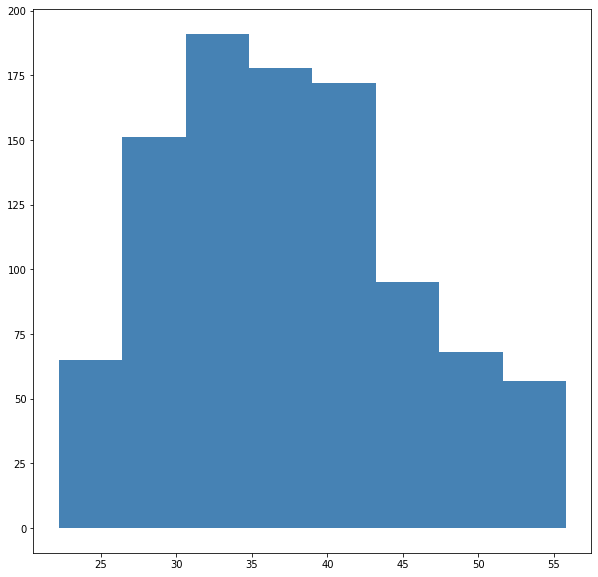

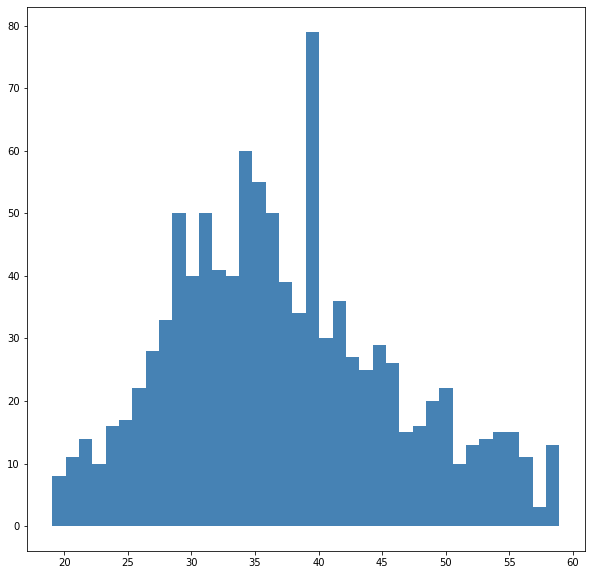

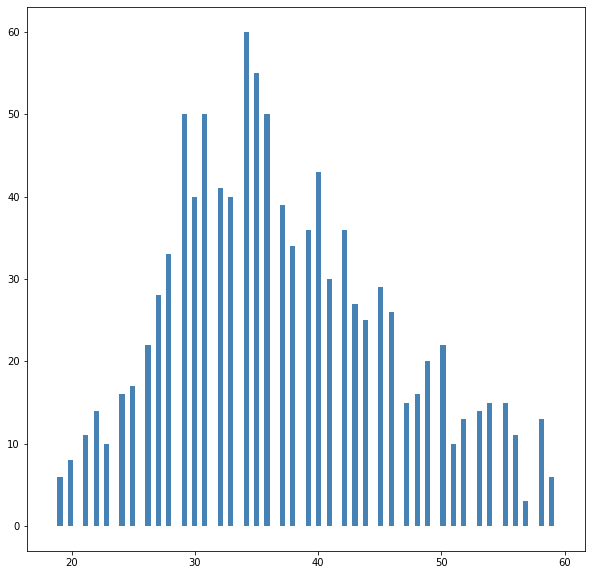

In [553]:
scol = "Age"
discretize, bin_edge, count = bin_and_count(train_set, scol, 10)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

discretize, bin_edge, count = bin_and_count(train_set, scol, 40)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

discretize, bin_edge, count = bin_and_count(train_set, scol, 100)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

For Age I would go for 40 since it enough to seperate the data to each bin and the distribution between 40 and 100 sizes isn't much different, also there are no zero count bin.

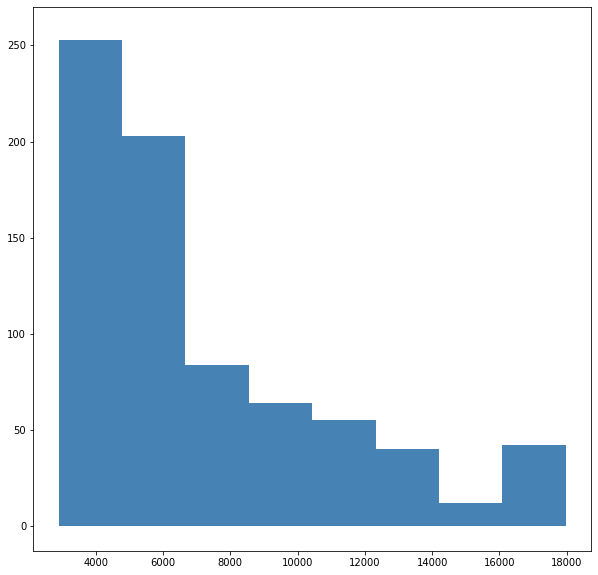

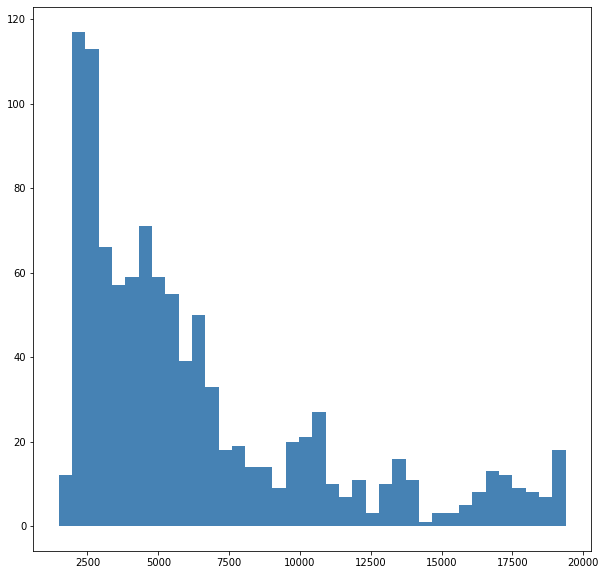

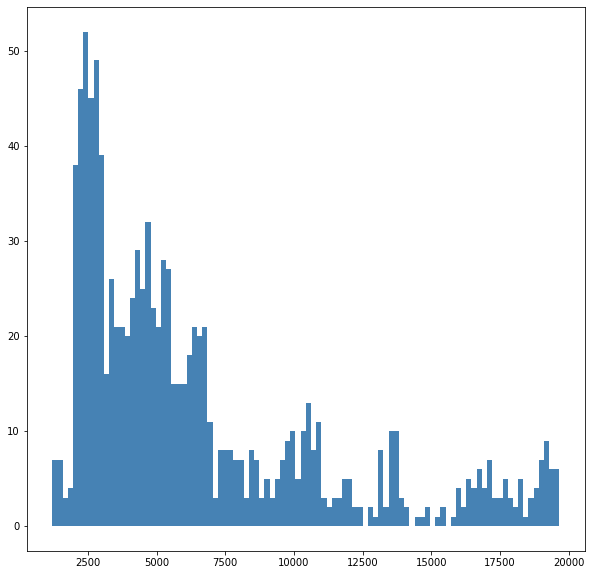

In [554]:
scol = "MonthlyIncome"
discretize, bin_edge, count = bin_and_count(train_set, scol, 10)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

discretize, bin_edge, count = bin_and_count(train_set, scol, 40)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

discretize, bin_edge, count = bin_and_count(train_set, scol, 100)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

For MonthlyIncome I would go for 100 since it could still distribute the data to all bins.

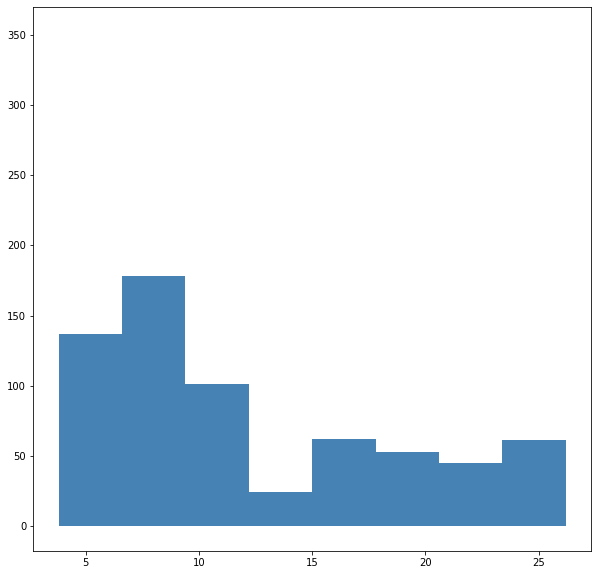

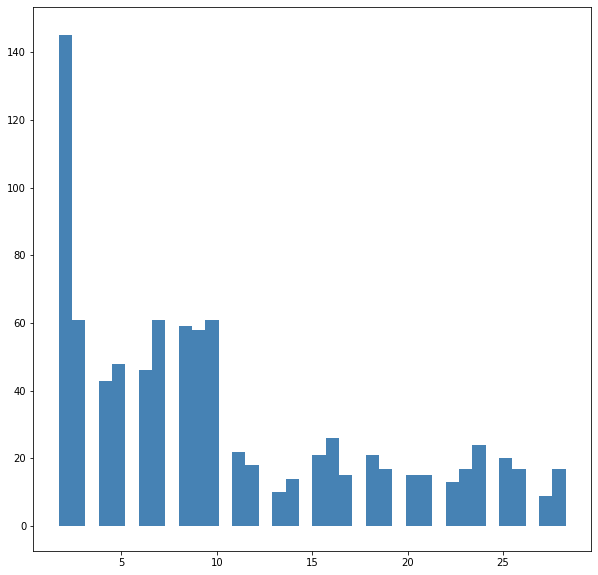

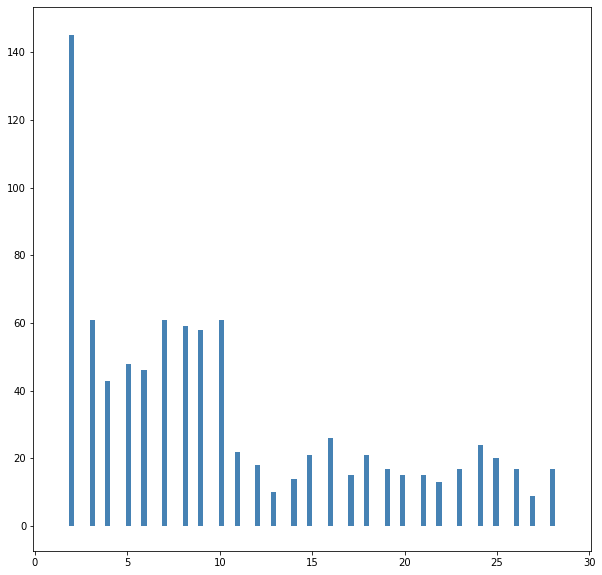

In [555]:
scol = "DistanceFromHome"
discretize, bin_edge, count = bin_and_count(train_set, scol, 10)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

discretize, bin_edge, count = bin_and_count(train_set, scol, 40)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

discretize, bin_edge, count = bin_and_count(train_set, scol, 100)
plt.fill_between(bin_edge.repeat(2)[1:-1], count.repeat(2), facecolor='steelblue')
plt.show()

For DistanceFromHome I would go for 10 bin counts because although 40 got a small zero bins but zero are still bad for the models since it could not handle for test data that goes into zero counts bin

## **T7.** For the rest of the features, which one should be discretized? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values.

In [556]:
to_discretized = []
for col in all.columns:
  no_unique = all[col].unique().shape[0]
  if(no_unique > 10):
    to_discretized.append(col)
to_discretized

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [557]:
bin_size_mapper = {"Age":40, "MonthlyIncome":100, "DistanceFromHome": 10}

We gonna split data in to 10 bins so my criteria is if unique of that data is less than 10, there are no point to split it.

In [558]:
def discretized(data, bin_size=10, bin_size_mapper={}):
  to_discretized = []
  for col in all.columns:
    no_unique = all[col].unique().shape[0]
    if(no_unique > 2 * bin_size):
      to_discretized.append(col)

  data_dc = data.copy()
  for col in to_discretized:
    if col in bin_size_mapper:
      discretize, bin_edge, count = bin_and_count(data, col, bin_size_mapper[col])
    else:
      discretize, bin_edge, count = bin_and_count(data, col, bin_size)
    data_dc.loc[~np.isnan(data[col]),col] = discretize
  return data_dc

In [559]:
train_set_dc = discretized(train_set, bin_size_mapper=bin_size_mapper)
train_set_dc

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1316,NaN,-1,NaN,-1,1.0,4.0,-1,1.0,1.0,-1,9.0,3.0,2.0,7,4.0,-1,25.0,7.0,1.0,0,0,20.0,4.0,3.0,80.0,1.0,2.0,NaN,3.0,2.0,7.0,NaN,7.0
1190,14.0,2,7.0,1,NaN,3.0,3,1.0,4.0,1,3.0,3.0,NaN,6,2.0,0,NaN,10.0,NaN,0,0,13.0,3.0,3.0,NaN,2.0,NaN,NaN,2.0,3.0,5.0,1.0,6.0
861,27.0,2,10.0,2,NaN,3.0,2,1.0,3.0,0,6.0,3.0,4.0,3,1.0,1,86.0,9.0,8.0,-1,-1,23.0,4.0,1.0,80.0,0.0,8.0,2.0,3.0,8.0,NaN,15.0,9.0
397,7.0,2,6.0,2,2.0,2.0,1,1.0,NaN,-1,10.0,2.0,2.0,7,4.0,2,19.0,5.0,1.0,0,1,11.0,3.0,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0,1.0,3.0
883,15.0,2,1.0,-1,NaN,3.0,-1,1.0,1.0,-1,5.0,3.0,1.0,6,4.0,-1,10.0,2.0,0.0,0,0,13.0,3.0,2.0,80.0,1.0,NaN,5.0,NaN,4.0,10.0,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,28.0,0,8.0,1,5.0,NaN,5,1.0,NaN,1,5.0,NaN,NaN,6,2.0,-1,24.0,1.0,8.0,0,0,18.0,3.0,3.0,NaN,1.0,5.0,NaN,4.0,NaN,7.0,1.0,7.0
352,29.0,2,NaN,-1,10.0,NaN,-1,1.0,1.0,0,9.0,3.0,3.0,3,3.0,1,61.0,9.0,3.0,0,0,21.0,4.0,2.0,80.0,1.0,4.0,3.0,NaN,1.0,0.0,0.0,0.0
900,18.0,-1,3.0,1,NaN,3.0,5,1.0,3.0,1,NaN,NaN,1.0,6,2.0,1,15.0,3.0,1.0,0,0,NaN,3.0,NaN,80.0,0.0,NaN,2.0,2.0,3.0,10.0,NaN,NaN
1285,27.0,0,6.0,2,9.0,2.0,1,1.0,2.0,1,NaN,2.0,NaN,7,2.0,2,38.0,10.0,8.0,0,0,15.0,NaN,3.0,80.0,0.0,2.0,3.0,3.0,1.0,2.0,2.0,2.0


# The MLE for the likelihood distribution of discretized histograms

## T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

normal distribution <br/>
Find the MLE of each distribution in each x by just return p(w1|x) of class w1.This come from eq. **p(w0|x)* 0 + p(w1|x)* 1 = p(w1|x)**<br/>
(let 0 is predict the Attrition as "No" and 1 is predict the Attrition as "Yes") <br/>
p(x|w) (x is discretize value of each bins, for w there are 2 case, w1: Attrition = "Yes", w2: Attrition = "No") <br/>
And then change it to MLE distribution p(w|x) by multiple by p(w) and divide by p(x) <br/>
**p(w|x) = (p(x|w) * p(w))/p(x)**<br/>


In [560]:
def likelihood_distribution(train_set_dc, train_res, scol):
  index = ~np.isnan(train_set_dc[scol])
  dd = train_set_dc[index][[scol]]
  dd["Attrition"] = train_res[index]
  w = dd.groupby(scol).size().reset_index(name="freq").set_index(scol)
  w["fw1"] = dd[dd["Attrition"] == 1].groupby(scol).size()
  w["fw1"] = w["fw1"].fillna(0)
  w["p(x|w1)"] = np.nan_to_num(w["fw1"]/w["fw1"].sum(), 0)
  
  w["fw0"] = dd[dd["Attrition"] == 0].groupby(scol).size()
  w["fw0"] = w["fw0"].fillna(0)
  w["p(x|w0)"] = np.nan_to_num(w["fw0"]/w["fw0"].sum(), 0)
  
  w["p(w1)"] = w["fw1"].sum()/w["freq"].sum()
  w["p(w0)"] = w["fw0"].sum()/w["freq"].sum()

  w["p(x)"] = w["freq"]/w["freq"].sum()
  w["p(w1|x)"] = w["p(x|w1)"]*w["p(w1)"]/w["p(x)"]
  w["p(w0|x)"] = w["p(x|w0)"]*w["p(w0)"]/w["p(x)"]
  w["sum"] = w["p(w1|x)"] + w["p(w0|x)"]
  w["p(w1|x)"] = w["p(w1|x)"]/w["sum"]
  w["p(w0|x)"] = w["p(w0|x)"]/w["sum"]
  w = w.reset_index()

  return w

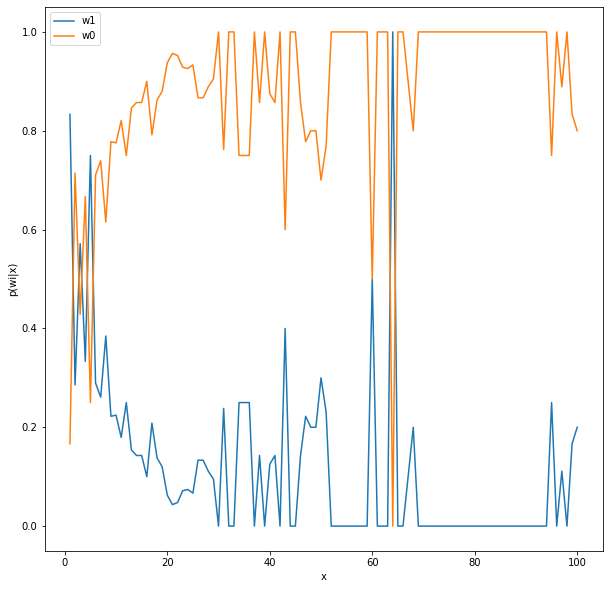

    MonthlyIncome  freq  fw1   p(x|w1)  ...      p(x)   p(w1|x)   p(w0|x)  sum
0             1.0     6  5.0  0.029762  ...  0.005671  0.833333  0.166667  1.0
1             2.0     7  2.0  0.011905  ...  0.006616  0.285714  0.714286  1.0
2             3.0     7  4.0  0.023810  ...  0.006616  0.571429  0.428571  1.0
3             4.0     3  1.0  0.005952  ...  0.002836  0.333333  0.666667  1.0
4             5.0     4  3.0  0.017857  ...  0.003781  0.750000  0.250000  1.0
..            ...   ...  ...       ...  ...       ...       ...       ...  ...
91           96.0     7  0.0  0.000000  ...  0.006616  0.000000  1.000000  1.0
92           97.0     9  1.0  0.005952  ...  0.008507  0.111111  0.888889  1.0
93           98.0     6  0.0  0.000000  ...  0.005671  0.000000  1.000000  1.0
94           99.0     6  1.0  0.005952  ...  0.005671  0.166667  0.833333  1.0
95          100.0     5  1.0  0.005952  ...  0.004726  0.200000  0.800000  1.0

[96 rows x 12 columns]


In [561]:
scol = "MonthlyIncome"
w = likelihood_distribution(train_set_dc, train_res, scol)
x = w[scol]

pw1x = w["p(w1|x)"]
plt.plot(x, pw1x, label = "w1")

pw0x = w["p(w0|x)"]
plt.plot(x, pw0x, label = "w0")

plt.xlabel('x')
plt.ylabel('p(wi|x)')
plt.legend()
plt.show()

print(w)

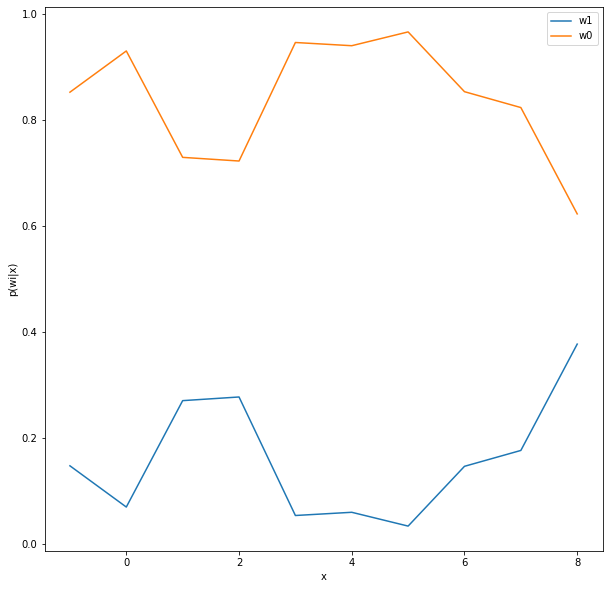

   JobRole  freq  fw1   p(x|w1)  ...      p(x)   p(w1|x)   p(w0|x)  sum
0       -1   265   39  0.183099  ...  0.200302  0.147170  0.852830  1.0
1        0   101    7  0.032864  ...  0.076342  0.069307  0.930693  1.0
2        1    37   10  0.046948  ...  0.027967  0.270270  0.729730  1.0
3        2   184   51  0.239437  ...  0.139078  0.277174  0.722826  1.0
4        3    75    4  0.018779  ...  0.056689  0.053333  0.946667  1.0
5        4   101    6  0.028169  ...  0.076342  0.059406  0.940594  1.0
6        5    60    2  0.009390  ...  0.045351  0.033333  0.966667  1.0
7        6   212   31  0.145540  ...  0.160242  0.146226  0.853774  1.0
8        7   227   40  0.187793  ...  0.171580  0.176211  0.823789  1.0
9        8    61   23  0.107981  ...  0.046107  0.377049  0.622951  1.0

[10 rows x 12 columns]


In [562]:
scol = "JobRole"
w = likelihood_distribution(train_set_dc, train_res, scol)
x = w[scol]

pw1x = w["p(w1|x)"]
plt.plot(x, pw1x, label = "w1")

pw0x = w["p(w0|x)"]
plt.plot(x, pw0x, label = "w0")

plt.xlabel('x')
plt.ylabel('p(wi|x)')
plt.legend()
plt.show()

print(w)

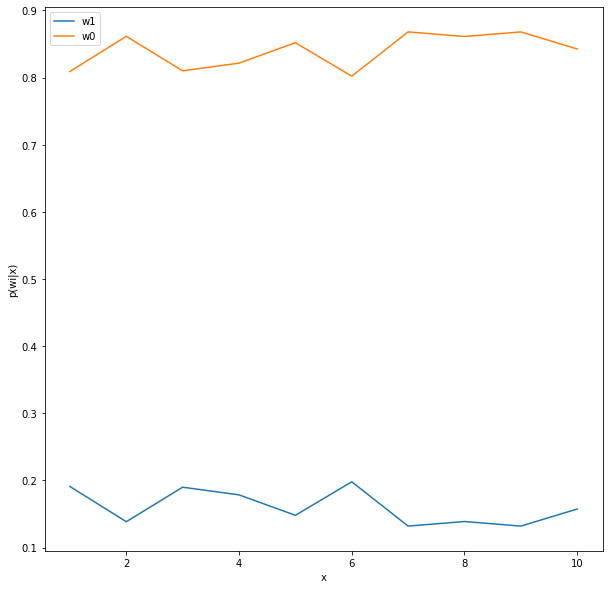

   HourlyRate  freq  fw1   p(x|w1)  ...      p(x)   p(w1|x)   p(w0|x)  sum
0         1.0    89   17  0.100592  ...  0.084121  0.191011  0.808989  1.0
1         2.0   101   14  0.082840  ...  0.095463  0.138614  0.861386  1.0
2         3.0   100   19  0.112426  ...  0.094518  0.190000  0.810000  1.0
3         4.0   112   20  0.118343  ...  0.105860  0.178571  0.821429  1.0
4         5.0   108   16  0.094675  ...  0.102079  0.148148  0.851852  1.0
5         6.0   101   20  0.118343  ...  0.095463  0.198020  0.801980  1.0
6         7.0   106   14  0.082840  ...  0.100189  0.132075  0.867925  1.0
7         8.0   108   15  0.088757  ...  0.102079  0.138889  0.861111  1.0
8         9.0   106   14  0.082840  ...  0.100189  0.132075  0.867925  1.0
9        10.0   127   20  0.118343  ...  0.120038  0.157480  0.842520  1.0

[10 rows x 12 columns]


In [563]:
scol = "HourlyRate"
w = likelihood_distribution(train_set_dc, train_res, scol)
x = w[scol]

pw1x = w["p(w1|x)"]
plt.plot(x, pw1x, label = "w1")

pw0x = w["p(w0|x)"]
plt.plot(x, pw0x, label = "w0")

plt.xlabel('x')
plt.ylabel('p(wi|x)')
plt.legend()
plt.show()

print(w)

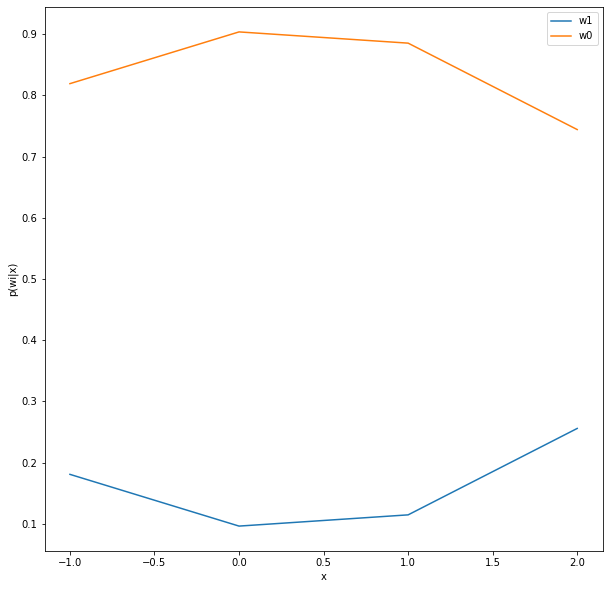

   MaritalStatus  freq  fw1   p(x|w1)  ...      p(x)   p(w1|x)   p(w0|x)  sum
0             -1   260   47  0.220657  ...  0.196523  0.180769  0.819231  1.0
1              0   239   23  0.107981  ...  0.180650  0.096234  0.903766  1.0
2              1   480   55  0.258216  ...  0.362812  0.114583  0.885417  1.0
3              2   344   88  0.413146  ...  0.260015  0.255814  0.744186  1.0

[4 rows x 12 columns]


In [564]:
scol = "MaritalStatus"
w = likelihood_distribution(train_set_dc, train_res, scol)
x = w[scol]

pw1x = w["p(w1|x)"]
plt.plot(x, pw1x, label = "w1")

pw0x = w["p(w0|x)"]
plt.plot(x, pw0x, label = "w0")

plt.xlabel('x')
plt.ylabel('p(wi|x)')
plt.legend()
plt.show()

print(w)

## T9. What is the prior distribution of the two classes?

Prior distribution is the point that two graph cross over <br/>
For **JobRole**, **HourlyRate**, and **MaritalStatus** the point are not prior distribution is not appear <br/>
For **MonthlyIncome**, the point is at middle of bin that the graph across as print point below

the point between class 1.0 and class 2.0 at x= 1.6101658035597717 y= 0.49919491709822017
the point between class 2.0 and class 3.0 at x= 2.7451959071624654 y= 0.49862740204641864
the point between class 3.0 and class 4.0 at x= 3.3069445836256137 y= 0.4983465277081872
the point between class 4.0 and class 5.0 at x= 4.3947263284059135 y= 0.4978026368357973
the point between class 5.0 and class 6.0 at x= 5.548881642926607 y= 0.49722555917853617
the point between class 59.0 and class 60.0 at x= 59.940059940059946 y= 0.47002997002997304
the point between class 60.0 and class 61.0 at x= 60.06006006006006 y= 0.46996996996997
the point between class 63.0 and class 64.0 at x= 63.46826586706647 y= 0.4682658670664708
the point between class 64.0 and class 65.0 at x= 64.53226613306653 y= 0.46773386693347163


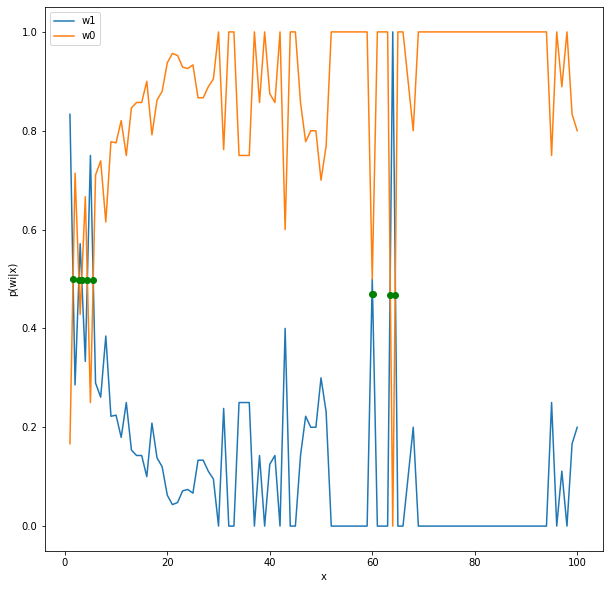

In [565]:
scol = "MonthlyIncome"
w = likelihood_distribution(train_set_dc, train_res, scol)
x = w[scol]

pw1x = w["p(w1|x)"]
plt.plot(x, pw1x, label = "w1")

pw0x = w["p(w0|x)"]
plt.plot(x, pw0x, label = "w0")

points_x = []
points_y = []
for i in range(w.shape[0] - 1):
  l1x1 = x[i]
  l1y1 = pw1x[i]
  l1x2 = x[i + 1]
  l1y2 = pw1x[i + 1]
  m1 = (l1y1 - l1y2)/(l1x1 - l1x2)
  c1 = l1y1 - m1*l1x1
  
  l0x1 = x[i]
  l0y1 = pw0x[i]
  l0x2 = x[i + 1]
  l0y2 = pw0x[i + 1]
  m2 = (l0y1 - l0y2)/(l0x1 - l0x2)
  c2 = l0y1 - m2*l0x1

  xx = (c2 - c1)/(m1 - m2 + 1e-3)
  if(x[i] <= xx and xx <= x[i + 1]):
    yy = m1*xx + c1
    print("the point between class", l1x1, "and class", l0x2, "at x=", xx, "y=", yy)
    points_x.append(xx)
    points_y.append(yy)

plt.plot(points_x, points_y, 'go')
plt.xlabel('x')
plt.ylabel('p(wi|x)')
plt.legend()
plt.show()

# Naive Bayes classification

## T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P(xi|attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

I'll add small value (1e-3) to P(xi|attrition) to make sure it is not 0 and the additional value are not affect much to my model.

## T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.

In [566]:
def naive_bayes_histogram(train_set_dc, train_res, test_set_dc, threshold=0):
  log_p_w1 = np.log(train_res.value_counts()[1]/train_res.count())
  log_p_w0 = np.log(train_res.value_counts()[0]/train_res.count())
  log_Hx = np.repeat(log_p_w1 - log_p_w0, test_set_dc.shape[0])
  for col in train_set_dc.columns:
    w = likelihood_distribution(train_set_dc, train_res, col)
    d = test_set_dc.loc[:,col]
    mapper_w1 = pd.Series(w["p(x|w1)"].values,index=w[col]).loc[:].to_dict()
    mapper_w0 = pd.Series(w["p(x|w0)"].values,index=w[col]).loc[:].to_dict()
    mapper_w1[np.nan] = 1
    mapper_w0[np.nan] = 1
    log_pxw1 = np.log(d.map(mapper_w1).loc[:] + 1e-3)
    log_pxw0 = np.log(d.map(mapper_w0).loc[:] + 1e-3)
    subtraction = log_pxw1 - log_pxw0
    log_Hx += subtraction
  predict = log_Hx.copy()
  class1 = log_Hx >= threshold
  predict[class1] = 1
  predict[~class1] = 0
  return predict, log_Hx

In [567]:
test_set_dc = discretized(test_set, bin_size_mapper=bin_size_mapper)

In [568]:
prediction_his, _ = naive_bayes_histogram(train_set_dc, train_res, test_set_dc)

In [569]:
def evaluation(prediction, actual, to_print):
  pcompare = pd.DataFrame(([prediction[prediction == 1] == actual[prediction == 1]])[0])
  tp = pcompare[pcompare == True].dropna().shape[0]
  fp = pcompare[pcompare == False].dropna().shape[0]

  ncompare = pd.DataFrame(([prediction[prediction == 0] == actual[prediction == 0]])[0])
  tn = ncompare[ncompare == True].dropna().shape[0]
  fn = ncompare[ncompare == False].dropna().shape[0]

  acc = (tp + tn)/prediction.shape[0]
  precision = 0
  if tp + fp > 0:
    precision = tp/(tp + fp)

  recall = 0
  if tp + fn > 0:
    recall = tp/(tp + fn)

  false_alarm = 0
  if fp + tn > 0:
    false_alarm = fp/(fp + tn)

  f1 = 0
  if precision + recall > 0:
    f1 = 2*precision*recall/(precision + recall)

  if to_print:
    print('overall accurracy is', acc)
    print('precision score is', precision)
    print('recall score is', recall)
    print('false alarm score is', false_alarm)
    print('f1 score is', f1)
    return
  return acc, precision, recall,false_alarm ,f1

In [570]:
evaluation(prediction_his, test_res, True)

overall accurracy is 0.8095238095238095
precision score is 0.4166666666666667
recall score is 0.4166666666666667
false alarm score is 0.11382113821138211
f1 score is 0.4166666666666667


# Probability density function


## T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.

In [571]:
from scipy.stats import norm

In [572]:
def naive_bayes_gaussian(train_set, train_res, test_set, threshold):
  log_p_w1 = np.log(train_res.value_counts()[1]/train_res.count())
  log_p_w2 = np.log(train_res.value_counts()[0]/train_res.count())
  log_Hx = np.repeat(log_p_w1 - log_p_w2, test_set_dc.shape[0])

  for col in train_set.columns:
    index = ~np.isnan(train_set[col])
    train_col_no_nan_w1 = train_set[train_res == 1 & index][col]
    mean,std = train_col_no_nan_w1.agg(['mean', 'std'])

    if std == 0:
      log_pxw1 = np.log(np.ones(test_set.shape[0]))
    else:
      log_pxw1 = np.log(norm(mean, std).pdf(test_set[col]))
      
    log_pxw1 = np.nan_to_num(log_pxw1, nan=1)
    
    train_col_no_nan_w2 = train_set[train_res == 0 & index][col]
    mean,std = train_col_no_nan_w2.agg(['mean', 'std'])

    if std == 0:
      log_pxw2 = np.log(np.ones(test_set.shape[0]))
    else:
      log_pxw2 = np.log(norm(mean, std).pdf(test_set[col]))

    log_pxw2 = np.nan_to_num(log_pxw2, nan=1)
    subtraction = log_pxw1 - log_pxw2
    log_Hx += subtraction
  class1 = log_Hx > threshold
  log_Hx[class1] = 1
  log_Hx[~class1] = 0

  return log_Hx

In [573]:
prediction_gs = naive_bayes_gaussian(train_set, train_res, test_set, 0)
prediction_gs

array([1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [574]:
evaluation(prediction_gs, test_res, True)

overall accurracy is 0.7755102040816326
precision score is 0.3448275862068966
recall score is 0.4166666666666667
false alarm score is 0.15447154471544716
f1 score is 0.37735849056603776


# Baseline comparison

## T13. The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [575]:
random_seed = 27
np.random.seed(random_seed)
random_predict = np.random.randint(2, size=test_res.shape[0])
evaluation(random_predict, test_res, True)

overall accurracy is 0.47619047619047616
precision score is 0.16455696202531644
recall score is 0.5416666666666666
false alarm score is 0.5365853658536586
f1 score is 0.2524271844660194


## T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.

My most frequent class is MonthlyIncome

In [576]:
col = "MonthlyIncome"
log_p_w1 = np.log(train_res.value_counts()[1]/train_res.count())
log_p_w0 = np.log(train_res.value_counts()[0]/train_res.count())
log_Hx = log_p_w1 - log_p_w0

w = likelihood_distribution(train_set_dc, train_res, col)
d = test_set_dc.loc[:,col]
mapper_w1 = pd.Series(w["p(x|w1)"].values,index=w[col]).loc[:].to_dict()
mapper_w0 = pd.Series(w["p(x|w0)"].values,index=w[col]).loc[:].to_dict()
mapper_w1[np.nan] = 1
mapper_w0[np.nan] = 1
log_pxw1 = np.log(d.map(mapper_w1).loc[:] + 1e-3)
log_pxw0 = np.log(d.map(mapper_w0).loc[:] + 1e-3)
subtraction = log_pxw1 - log_pxw0
log_Hx += subtraction

In [577]:
income_predict = log_Hx.copy()
class1 = log_Hx >= 0
income_predict[class1] = 1
income_predict[~class1] = 0
income_predict.value_counts()
evaluation(income_predict, test_res, True)

overall accurracy is 0.8299319727891157
precision score is 0.0
recall score is 0.0
false alarm score is 0.008130081300813009
f1 score is 0


## T15. Compare the two baselines with your Naive Bayes classifier.

In [578]:
pd.DataFrame({"naive bayes":evaluation(prediction_his, test_res, False),
              "random":evaluation(random_predict, test_res, False),
              "max freq (MonthlyIncome)":evaluation(income_predict, test_res, False)},
              ["accuracy", "precision", "recall", "false_alarm" , "f1"])

,naive bayes,random,max freq (MonthlyIncome)
accuracy,0.809524,0.476190,0.829932
precision,0.416667,0.164557,0.000000
recall,0.416667,0.541667,0.000000
false_alarm,0.113821,0.536585,0.008130
f1,0.416667,0.252427,0.000000


In this comparision the best accuracy, precision and f1 is goes to naive bayes random got a better recall rate and the best false alarm goes to my most frequent variable, MonthlyIncome.

# Threshold finding

## T16. Use the following threshold values t = np.arange(-5,5,0.05) find the best accuracy, and F score (and the corresponding thresholds)

In [579]:
_, log_Hx = naive_bayes_histogram(train_set_dc, train_res, test_set_dc, 0)
def generate_evaluation_table(log_Hx, thresholds):
  evaluation_table = pd.DataFrame({"threshold": thresholds, "accuracy": np.zeros(thresholds.shape), 
                                   "precision": np.zeros(thresholds.shape), "recall": np.zeros(thresholds.shape),
                                   "false_alarm": np.zeros(thresholds.shape), "f1": np.zeros(thresholds.shape)})
  for i in range(t.shape[0]):
    predict = np.zeros(log_Hx.shape[0])
    predict[log_Hx >= thresholds[i]] = 1
    evaluation_table.loc[i,["accuracy", "precision", "recall", "false_alarm", "f1"]] = evaluation(predict, test_res, False)
  return evaluation_table

In [580]:
_, log_Hx = naive_bayes_histogram(train_set_dc, train_res, test_set_dc, 0)
t = np.arange(-5 ,5 ,0.05)
evaluation_table_his = generate_evaluation_table(log_Hx, t)
evaluation_table_his.head()

,threshold,accuracy,precision,recall,false_alarm,f1
0,-5.00,0.421769,0.191919,0.791667,0.650407,0.308943
1,-4.95,0.421769,0.191919,0.791667,0.650407,0.308943
2,-4.90,0.421769,0.191919,0.791667,0.650407,0.308943
3,-4.85,0.421769,0.191919,0.791667,0.650407,0.308943
4,-4.80,0.421769,0.191919,0.791667,0.650407,0.308943


In [602]:
best_acc = evaluation_table_his["accuracy"].max()
best_f1 = evaluation_table_his["f1"].max()
print("histogram")
print("best accuracy is", best_acc, "at threshold\n", np.array(evaluation_table_his[evaluation_table_his["accuracy"] == best_acc]["threshold"]))
print("best f1 is", best_f1, "at threshold\n", np.array(evaluation_table_his[evaluation_table_his["f1"] == best_f1]["threshold"]))

histogram
best accuracy is 0.8503401360544217 at threshold
 [1.35 1.4  1.45 2.25 2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75 2.8
 2.85 2.9  2.95 3.   3.05 3.1  3.15 4.6 ]
best f1 is 0.43333333333333335 at threshold
 [-0.9]


# Receiver Operating Characteristic (RoC) curve

## T17. Plot the RoC of your classifier.

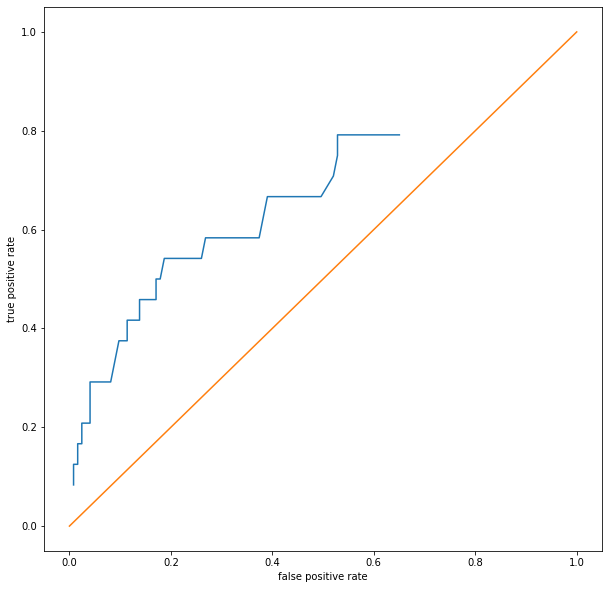

In [582]:
recalls = evaluation_table_his["recall"]
false_alarms = evaluation_table_his["false_alarm"]
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(false_alarms, recalls)
plt.plot([0,1], [0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.show()

## T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.

In [583]:
train_set_dc_5 = discretized(train_set, 5, bin_size_mapper)
test_set_dc_5 = discretized(test_set, 5, bin_size_mapper)

In [584]:
_, log_Hx = naive_bayes_histogram(train_set_dc_5, train_res, test_set_dc_5, 0)
t = np.arange(-5 ,5 ,0.05)
evaluation_table_his_d5 = generate_evaluation_table(log_Hx, t)
evaluation_table_his_d5.head()

,threshold,accuracy,precision,recall,false_alarm,f1
0,-5.00,0.367347,0.177570,0.791667,0.715447,0.290076
1,-4.95,0.367347,0.177570,0.791667,0.715447,0.290076
2,-4.90,0.374150,0.179245,0.791667,0.707317,0.292308
3,-4.85,0.380952,0.180952,0.791667,0.699187,0.294574
4,-4.80,0.387755,0.182692,0.791667,0.691057,0.296875


In [603]:
best_acc = evaluation_table_his_d5["accuracy"].max()
best_f1 = evaluation_table_his_d5["f1"].max()
print("histogram")
print("best accuracy is", best_acc, "at threshold\n", np.array(evaluation_table_his_d5[evaluation_table_his_d5["accuracy"] == best_acc]["threshold"]))
print("best f1 is", best_f1, "at threshold\n", np.array(evaluation_table_his_d5[evaluation_table_his_d5["f1"] == best_f1]["threshold"]))

histogram
best accuracy is 0.8435374149659864 at threshold
 [2.7  2.75 2.8  2.85 2.9  2.95 3.   3.05 3.1  4.3  4.35 4.4  4.45 4.5
 4.55 4.6  4.65 4.7  4.75 4.8  4.85 4.9  4.95]
best f1 is 0.4583333333333333 at threshold
 [0.45 0.5  0.55 0.6  0.65]


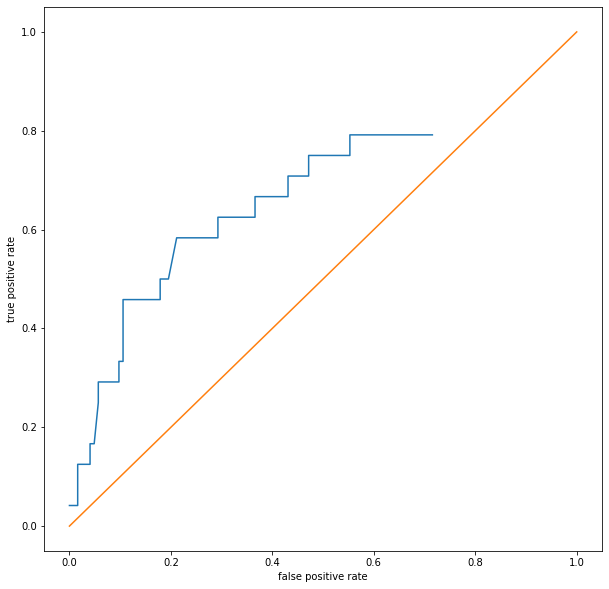

In [586]:
recalls_d5 = evaluation_table_his_d5["recall"]
false_alarms_d5 = evaluation_table_his_d5["false_alarm"]
plt.plot(false_alarms_d5, recalls_d5)
plt.plot([0,1], [0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.show()

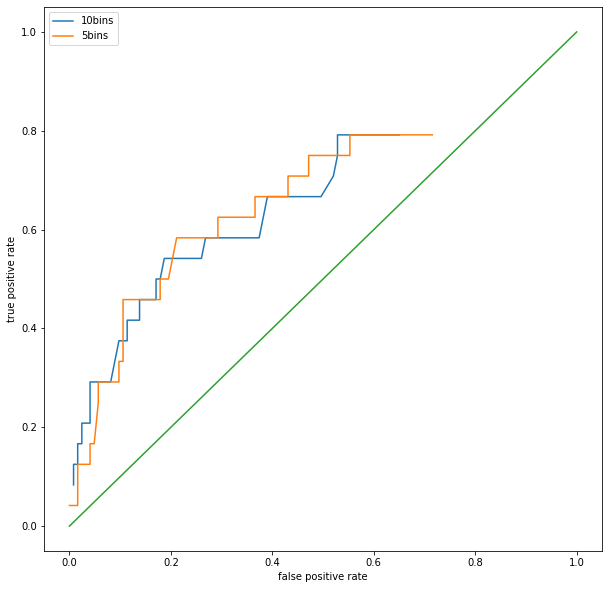

In [587]:
plt.plot(false_alarms, recalls, label="10bins")
plt.plot(false_alarms_d5, recalls_d5, label="5bins")
plt.plot([0,1], [0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")
plt.legend()
plt.show()

In [588]:
(recalls/(false_alarms + 1e-3) > recalls_d5/(false_alarms_d5)).value_counts()

True     158
False     42
dtype: int64

In comparing tp rate/fp rate point by point it appear that bin size = 10 has a better performance, however if we keep increase bin size the performance may could drop since the size of data is not enough for the increasingly bin size, but for ideal size (very large data size) we can implies from this result that higher bin size but not too frequent size.

# Classifier Variance


## OT3. Shuffle the database, and create new test and train sets. Redo the entire training and evaluation process 10 times (each time with a new training and test set). Calculate the mean and variance of the accuracy rate.

In [589]:
shuffle_table = pd.DataFrame({"random_seed": np.arange(10), "accuracy": np.zeros(10), 
                                   "precision": np.zeros(10), "recall": np.zeros(10),
                                   "false_alarm": np.zeros(10), "f1": np.zeros(10)})
shuffle_table = shuffle_table.set_index("random_seed")
e_tables = []
for i in range(10):
  train_set,test_set,train_res,test_res = train_test_split(X,y,stratify=y,test_size=0.10, random_state=i)
  i_train_set_dc = discretized(train_set, 5, bin_size_mapper)
  i_test_set_dc = discretized(test_set, 5, bin_size_mapper)
  prediction, log_Hx = naive_bayes_histogram(i_train_set_dc, train_res, i_test_set_dc)
  e_tables.append(generate_evaluation_table(log_Hx, t))
  shuffle_table.loc[i,["accuracy", "precision", "recall", "false_alarm", "f1"]] = evaluation(prediction, test_res, False)
shuffle_table

,accuracy,precision,recall,false_alarm,f1
random_seed,,,,,
0,0.789116,0.333333,0.291667,0.113821,0.311111
1,0.850340,0.531250,0.708333,0.121951,0.607143
2,0.775510,0.354839,0.458333,0.162602,0.400000
3,0.802721,0.400000,0.416667,0.121951,0.408163
4,0.843537,0.520000,0.541667,0.097561,0.530612
5,0.802721,0.391304,0.375000,0.113821,0.382979
6,0.789116,0.393939,0.541667,0.162602,0.456140
7,0.823129,0.454545,0.416667,0.097561,0.434783
8,0.802721,0.413793,0.500000,0.138211,0.452830


In [590]:
shuffle_table.agg(["mean", "var"])

,accuracy,precision,recall,false_alarm,f1
mean,0.807483,0.414300,0.454167,0.123577,0.430194
var,0.000587,0.004649,0.015992,0.000570,0.008106


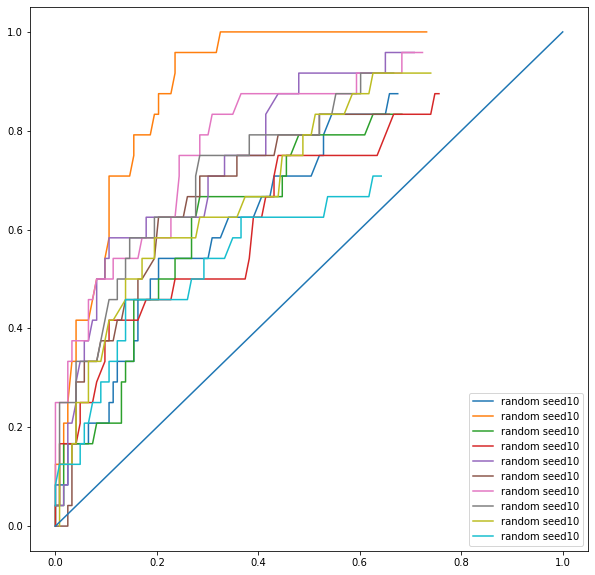

In [591]:
for i in range(10):
  table = e_tables[i]
  recalls = table["recall"]
  false_alarms = table["false_alarm"]
  plt.plot(false_alarms, recalls, label="random seed" + str(10))
plt.legend()
plt.plot([0,1], [0,1])
plt.show()